### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 30th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

In [32]:
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data = np.load('../../homeworks/hw_data/hw7_data_1.npy')
X = data[:,:2]
y = data[:,2]
yerr = data[:,3]

print(X.shape)
print(y.shape)
print(yerr.shape)


(500, 2)
(500,)
(500,)


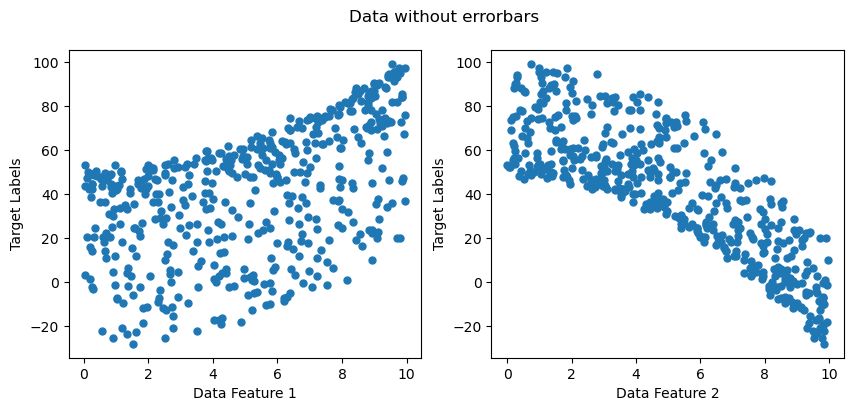

In [55]:
# scatter plots
%matplotlib inline 

fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].scatter(X[:,0],y,s=25)
axs[1].scatter(X[:,1],y,s=25)

axs[0].set_xlabel('Data Feature 1')
axs[0].set_ylabel('Target Labels')
axs[1].set_xlabel('Data Feature 2')
axs[1].set_ylabel('Target Labels')

plt.suptitle('Data without errorbars')
plt.show()


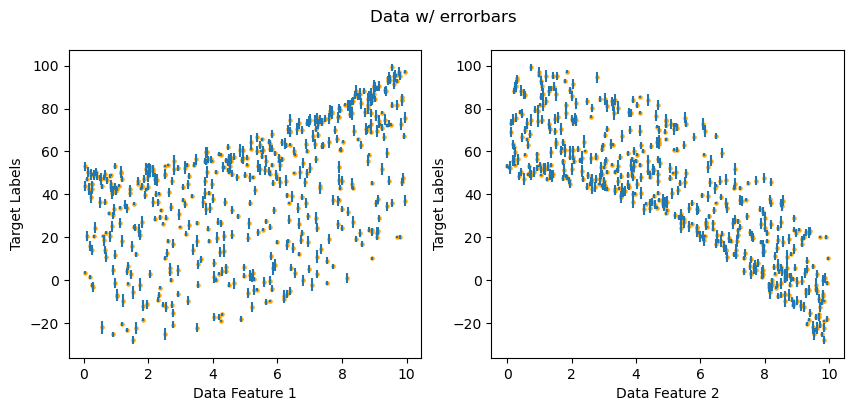

In [56]:
# scatter plots with error bars

%matplotlib inline 

fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].errorbar(x=X[:,0],y=y,yerr=yerr,fmt='none')
axs[1].errorbar(x=X[:,1],y=y,yerr=yerr,fmt='none')
axs[0].scatter(X[:,0],y,s=5,color='orange')
axs[1].scatter(X[:,1],y,s=5,color='orange')

axs[0].set_xlabel('Data Feature 1')
axs[0].set_ylabel('Target Labels')
axs[1].set_xlabel('Data Feature 2')
axs[1].set_ylabel('Target Labels')

plt.suptitle('Data w/ errorbars')
plt.show()


Errorbars are very tiny!

2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

In [69]:
# from Lecture 17
# astroML better than sklearn here because sklearn doesn't do heteroscedastic uncertainties

from astroML.linear_model import LinearRegression

# create xgrid that we will evaluate the model on later
Xgrid = np.empty((50,2))
Xgrid[:,0] = np.linspace(min(X[:,0]), max(X[:,0]),50)
Xgrid[:,1] = np.linspace(min(X[:,1]), max(X[:,1]),50)

# make the model using our data
model = LinearRegression()
model.fit(X, y, yerr)

print(model.coef_) # yint, slope1, and slope2
yint = model.coef_[0]
slope1 = model.coef_[1]
slope2 = model.coef_[2] 

[57.10102323  4.94873016 -8.30023407]


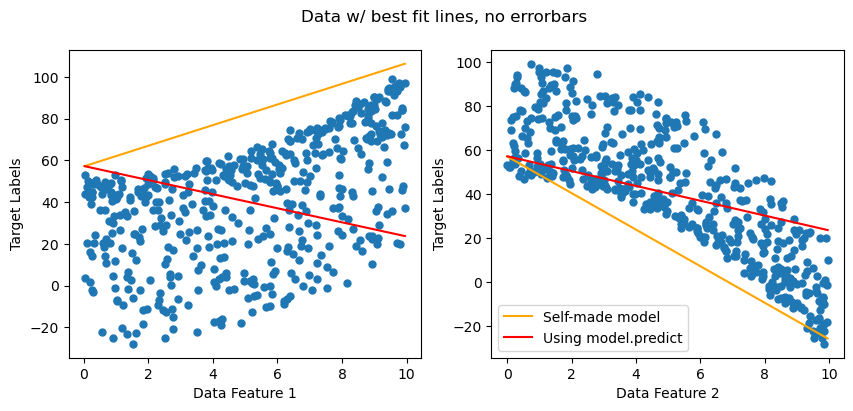

In [77]:
# scatter plots with best fit lines superimposed

### Always do this line at the start
### of a static plotting cell
%matplotlib inline 

fig, axs = plt.subplots(1,2,figsize=(10,4))

# plot data again
axs[0].scatter(X[:,0],y,s=25)
axs[1].scatter(X[:,1],y,s=25)

# best fit line
bestFit1 = yint + slope1*Xgrid[:,0] # evaluate model on Xgrid, not data
bestFit2 = yint + slope2*Xgrid[:,1]

y_pred = model.predict(Xgrid)

axs[0].plot(Xgrid[:,0],bestFit1,color='orange',label='Self-made model')
axs[1].plot(Xgrid[:,1],bestFit2,color='orange',label='Self-made model')

axs[0].plot(Xgrid[:,0],y_pred,color='red',label='Using model.predict')
axs[1].plot(Xgrid[:,1],y_pred,color='red',label='Using model.predict')

axs[0].set_xlabel('Data Feature 1')
axs[0].set_ylabel('Target Labels')
axs[1].set_xlabel('Data Feature 2')
axs[1].set_ylabel('Target Labels')

plt.suptitle('Data w/ best fit lines, no errorbars')
plt.legend()
plt.show()

Neither of these fits, either with the one going feature by feature or the one using model.predict which requires to be given 2D to return a 1D prediction that fits for both features at the same time (?), are all that great. 

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [88]:
# create meshgrid, with help from Levi
x1_vals = np.linspace(min(X[:,0]), max(X[:,0]),50)
x2_vals = np.linspace(min(X[:,1]), max(X[:,1]),50)
xx1, xx2 = np.meshgrid(x1_vals,x2_vals)
stacked = np.vstack([xx1.flatten(),xx2.flatten()])
meshgrid = stacked.T
print(meshgrid)
print(meshgrid.shape)

[[2.95429540e-02 4.17030911e-03]
 [2.31921349e-01 4.17030911e-03]
 [4.34299744e-01 4.17030911e-03]
 ...
 [9.54132751e+00 9.95007514e+00]
 [9.74370591e+00 9.95007514e+00]
 [9.94608430e+00 9.95007514e+00]]
(2500, 2)


In [89]:
# predict labels using model from part 2
pred_2d = model.predict(meshgrid)
print(pred_2d.shape)

(2500,)


In [11]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

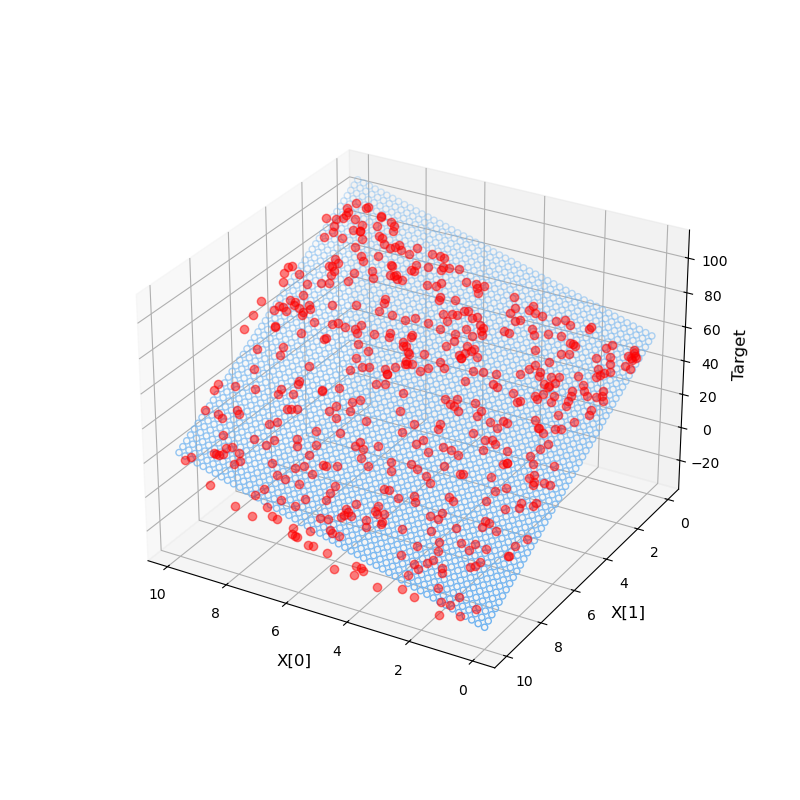

In [90]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.plot(X[:,0], X[:,1], y, color='red', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# plot the meshgrid with predicted labels
ax.scatter(xx1.flatten(), xx2.flatten(), pred_2d, 
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']} # this is an input to GridSearchCV

grid = GridSearchCV(Ridge(), param_grid=ridge_params)
grid.fit(X,y) # doesn't want yerr here

print('Best params:',grid.best_params_)
print('Best score:',grid.best_score_)

Best params: {'alpha': 1.0, 'solver': 'svd'}
Best score: 0.9290800590702192


In [98]:
# run a ridge regression with these params
ridge = Ridge(alpha=1.0,solver='svd')

# fit to data
ridge.fit(X,y,yerr)

# now predict on meshgrid
ypred_ridge = ridge.predict(meshgrid)

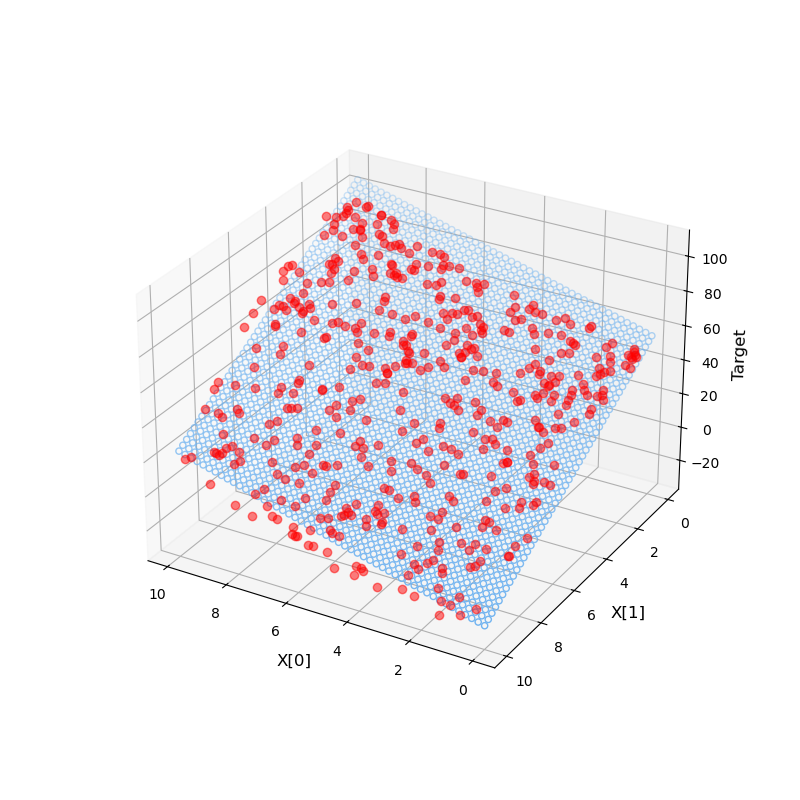

In [99]:
# view as 3d again

%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.plot(X[:,0], X[:,1], y, color='red', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# plot the meshgrid with predicted labels
ax.scatter(xx1.flatten(), xx2.flatten(), ypred_ridge, 
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

In [116]:
from sklearn.linear_model import RidgeCV

# run a ridgeCV regression, give it alpha range to try out
ridge_cv = RidgeCV(alphas=ridge_params['alpha'])

# fit to data
ridge_cv.fit(X,y,yerr)

# see best alpha value
print(ridge_cv.alpha_) # have to call this after fitting, otherwise it doesn't have .alpha_ attribute

# now predict on meshgrid
ypred_ridge_cv = ridge_cv.predict(meshgrid)

<class 'sklearn.linear_model._ridge.RidgeCV'>
1.0


The cross-validated alpha here is 1.0, same as when we performed the GridCV search ourselves. This way is more compact. 

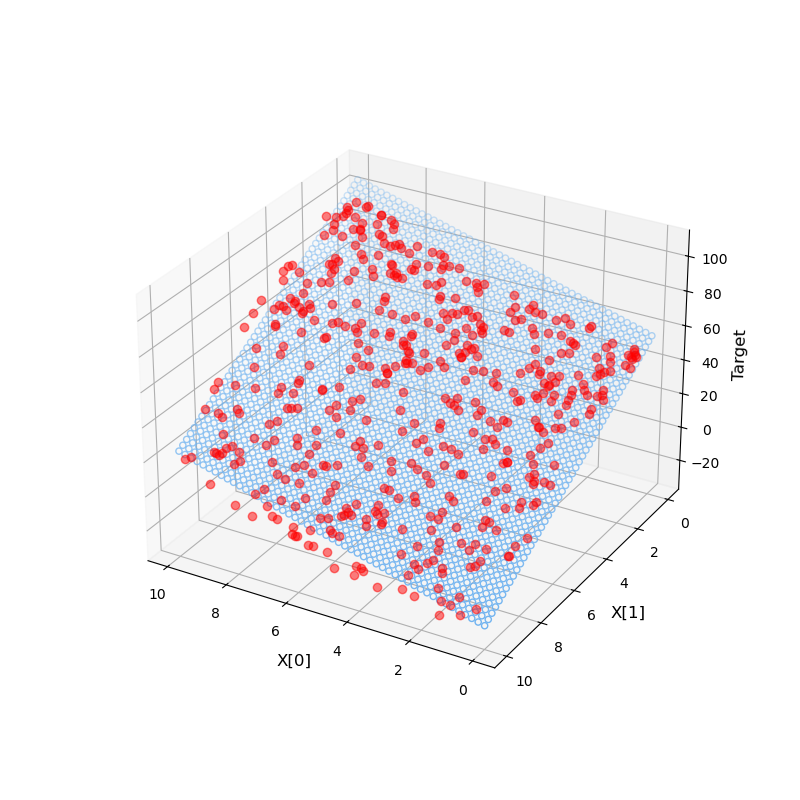

In [110]:
# plot 3D again
%matplotlib widget 

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.plot(X[:,0], X[:,1], y, color='red', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# plot the meshgrid with predicted labels
ax.scatter(xx1.flatten(), xx2.flatten(), ypred_ridge_cv, 
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Makes sense that this plot looks the same as the other plot since they are both using Ridge regression and alpha = 1.0.

5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

In [132]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

gpr1 = GaussianProcessRegressor(alpha=(yerr/y)**2) # uncertainties accounted for
gpr1.fit(X,y)
f1, f1_err = gpr1.predict(meshgrid, 
                         return_std=True)

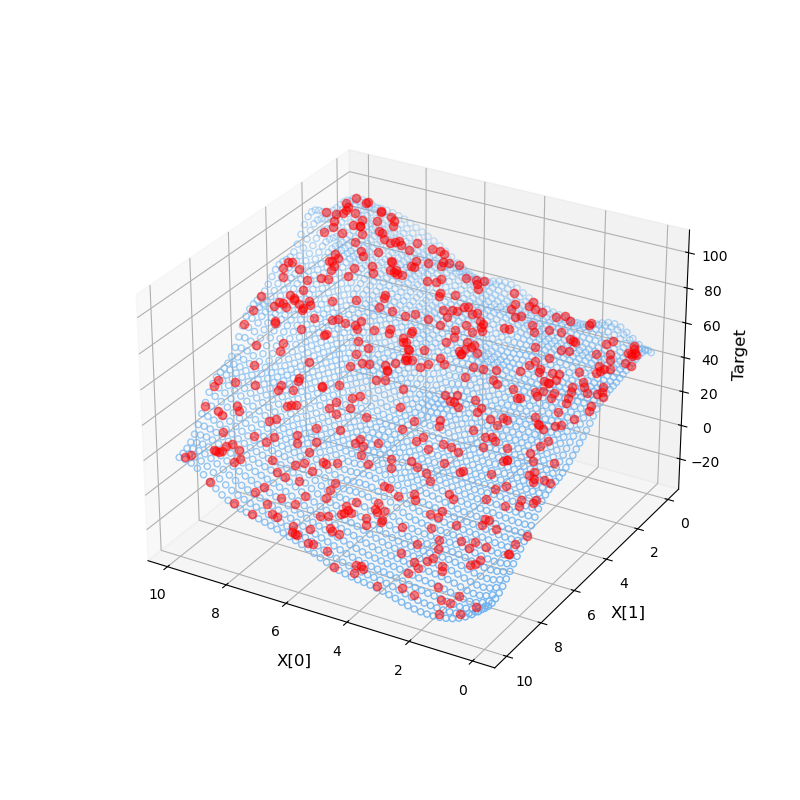

In [133]:
%matplotlib widget 

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.plot(X[:,0], X[:,1], y, color='red', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# plot the meshgrid with predicted labels
ax.scatter(xx1.flatten(), xx2.flatten(), f1,
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Now without the uncertainties accounted for:

In [130]:
gpr2 = GaussianProcessRegressor() # pass no alpha so that we are not accounting for yerr
gpr2.fit(X,y)
f2, f2_err = gpr1.predict(meshgrid, 
                         return_std=True)

Text(0.5, 0, 'Target')

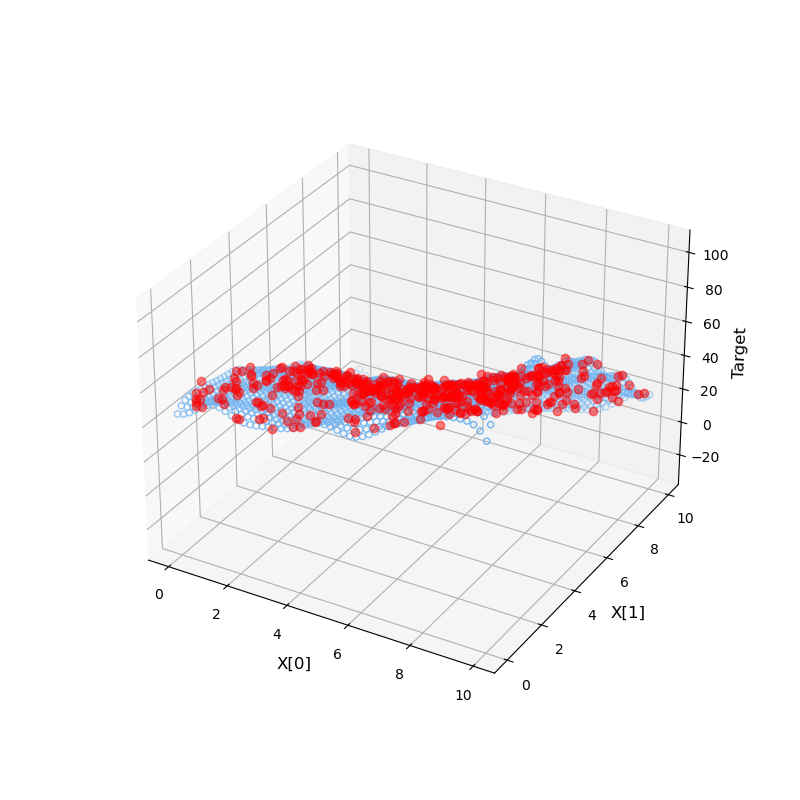

In [131]:
%matplotlib widget 

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.plot(X[:,0], X[:,1], y, color='red', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# plot the meshgrid with predicted labels
ax.scatter(xx1.flatten(), xx2.flatten(), f2,
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)


Visually, these two GPR fits don't look too different from each other and they both look like good fits to the data, though compared to other models they might be overfitting. It makes sense to me that they look so similar because the yerr values are super small, which we saw when I plotted the two data features on scatter plots with their errorbars. 

6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

In [139]:
from astroML.linear_model import PolynomialRegression

degree = 4
poly = PolynomialRegression(degree)
poly.fit(X,y)

print('Best fit coefficients:',poly.coef_)

# predict on meshgrid
y_pred_poly = poly.predict(meshgrid)

Best fit coefficients: [ 5.00363666e+01  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


Text(0.5, 0, 'Target')

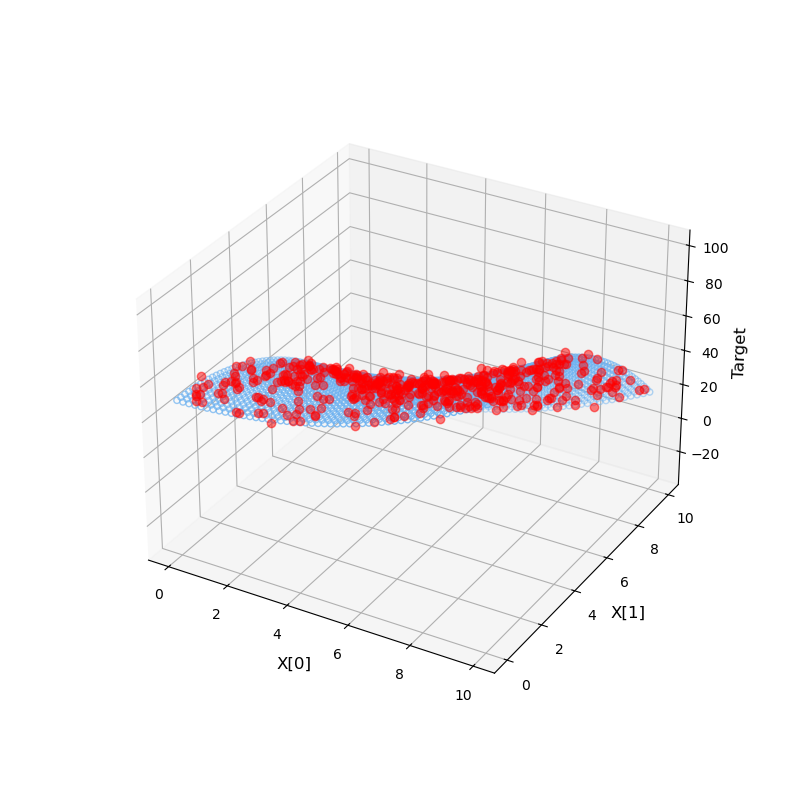

In [136]:
%matplotlib widget 

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.plot(X[:,0], X[:,1], y, color='red', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# plot the meshgrid with predicted labels
ax.scatter(xx1.flatten(), xx2.flatten(), y_pred_poly,
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

This fit looks the best to me from all we've tried. It captures the general curvature of the data, unlike the linear regression, and doesn't overfit for all of the variation amongst the datapoints, unlike the gaussian process regression.

7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [199]:
from sklearn.model_selection import train_test_split

# docs seem to show that for each array given, train then test is outputted

# split 20% off for testing
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X,y,yerr,test_size=0.2)

# split 20% off of the training set to be the cross validation set
    # test is normally the thing test_size is applied to so call it CV in the output, rewrite training sets so they are now smaller
X_train, X_cv, y_train, y_cv, yerr_train, yerr_cv = train_test_split(X_train,y_train,yerr_train,test_size=0.2)


In [200]:
print(yerr_train.shape)
print(yerr_test.shape)
print(yerr_cv.shape)

(320,)
(100,)
(80,)


In [201]:
# compute the training and cross-validation rms & BIC as a function of polynomial degree
# following cross validation section from Lecture 17

degrees = np.arange(1,11)
rms_train = np.zeros(len(degrees))
rms_cv = np.zeros(len(degrees))
i_best = 0

for i, degree in enumerate(degrees):
    
    # fit training data to model
    poly = PolynomialRegression(degree=degree)
    poly.fit(X_train, y_train)

    # predict on train & cv sets
    y_pred_train = poly.predict(X_train)
    y_pred_cv = poly.predict(X_cv)

    # get RMS value, compares predicted train & cv with originals
    rms_train[i] = np.mean(np.sqrt((y_pred_train - y_train) ** 2))
    rms_cv[i] = np.mean(np.sqrt((y_pred_cv - y_cv) ** 2))

    # choose best degree by the smallest RMS
    if rms_cv[i] <= rms_cv[i_best]:
        i_best = i
        y_pred_best = y_pred

# get BIC value
bic_train = np.sqrt(len(y)) * rms_train / 1 + degrees * np.log(len(y)) # dy in Lecture 17 instead of 1 but yerr doesn't fit here
bic_cv = np.sqrt(len(y)) * rms_cv / 1 + degrees * np.log(len(y))

best_deg = degrees[i_best]
print('Best degree:',best_deg)


Best degree: 4


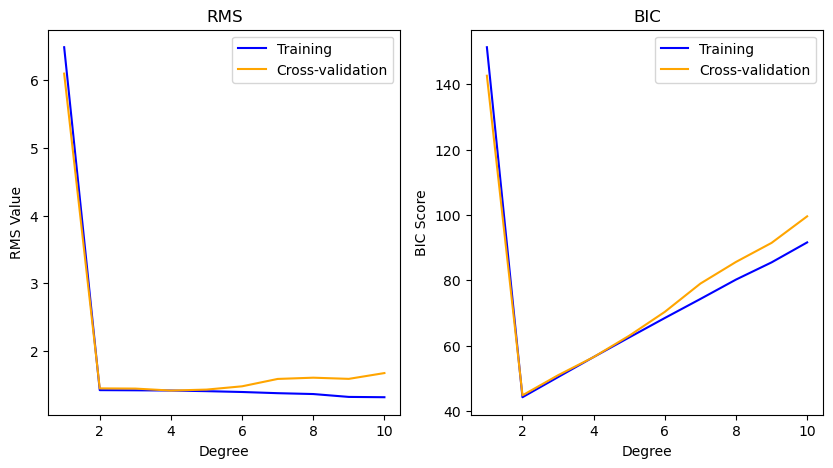

In [202]:
# plot rms and BIC as a function of degree
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(degrees,rms_train,color='blue',label='Training')
axes[0].plot(degrees,rms_cv,color='orange',label='Cross-validation')
axes[0].set_title('RMS')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('RMS Value')
axes[0].legend()

axes[1].plot(degrees,bic_train,color='blue',label='Training')
axes[1].plot(degrees,bic_cv,color='orange',label='Cross-validation')
axes[1].set_title('BIC')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('BIC Score')
axes[1].legend()

plt.show()

The degree that provided the lowest RMS was what was implemented for picking the optimal degree, but the train_test_split operation (which involves some randomness) when tried again and again would return 2, 3, or 4 degrees consistently. Looking at this plot, we can see that the RMS as an indicator is indifferent between 2 and 4 degrees, but the BIC is not -- there is a preference for 2. Even if we didn't have the BIC, it'd probably still be best to go with degree = 2 as a less complicated model is more favored. 

In [203]:
#Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. 
best_degree = 2

final_poly = PolynomialRegression(degree=best_degree)
final_poly.fit(X_train, y_train)

# predict on test set
y_pred_test = final_poly.predict(X_test)

# get test rms error
test_rms = np.mean(np.sqrt((y_pred_test - y_test) ** 2))
print('Test RMS Error',test_rms)


Test RMS Error 1.395127246601639


This RMS error is low, comparable to the lowest RMS values from our search across degrees. This makes sense, because nothing is fundamentally different about the test data. 